<a href="https://colab.research.google.com/github/olucascruz/analise_exploratoria/blob/main/analise_precificacao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## imports

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import StandardScaler

### Load data

In [ ]:
df = pd.read_csv(r"/content/drive/MyDrive/database/teste_indicium_precificacao.csv")
df.head(3)

,id,nome,host_id,host_name,bairro_group,bairro,latitude,longitude,room_type,price,minimo_noites,numero_de_reviews,ultima_review,reviews_por_mes,calculado_host_listings_count,disponibilidade_365
0,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
1,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
2,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194


Verificar se dados precisam de limpeza

Verificar outlines

Verificar correlações entre variaveis

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48894 entries, 0 to 48893
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   id                             48894 non-null  int64  
 1   nome                           48878 non-null  object 
 2   host_id                        48894 non-null  int64  
 3   host_name                      48873 non-null  object 
 4   bairro_group                   48894 non-null  object 
 5   bairro                         48894 non-null  object 
 6   latitude                       48894 non-null  float64
 7   longitude                      48894 non-null  float64
 8   room_type                      48894 non-null  object 
 9   price                          48894 non-null  int64  
 10  minimo_noites                  48894 non-null  int64  
 11  numero_de_reviews              48894 non-null  int64  
 12  ultima_review                  38842 non-null 

In [ ]:
df.shape

(48894, 16)

In [ ]:
for column in df.columns:
  print(column, end=" ")

id nome host_id host_name bairro_group bairro latitude longitude room_type price minimo_noites numero_de_reviews ultima_review reviews_por_mes calculado_host_listings_count disponibilidade_365 

In [ ]:
df[df.bairro == "Fort Wadsworth"]

,id,nome,host_id,host_name,bairro_group,bairro,latitude,longitude,room_type,price,minimo_noites,numero_de_reviews,ultima_review,reviews_por_mes,calculado_host_listings_count,disponibilidade_365
25385,20305160,Beach House Retreat. 15 minutes from Manhattan.,1715301,Mark,Staten Island,Fort Wadsworth,40.59546,-74.06092,Entire home/apt,800,7,0,NaN,NaN,3,365


In [ ]:
print("número de colunas:",len(df.columns))

número de colunas: 16


In [ ]:
print(df.isnull().sum())

id                                   0
nome                                16
host_id                              0
host_name                           21
bairro_group                         0
bairro                               0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimo_noites                        0
numero_de_reviews                    0
ultima_review                    10052
reviews_por_mes                  10052
calculado_host_listings_count        0
disponibilidade_365                  0
dtype: int64


In [ ]:
mean_price = df.price.mean()
max_price = df.price.max()
min_price = df.price.min()
print(
    f"Mean price: {mean_price} \n Max price: {max_price} \n Min price: {min_price}"
)

Mean price: 152.7207632838385 
 Max price: 10000 
 Min price: 0


In [ ]:
df.query("ultima_review.isna() and numero_de_reviews != 0")

,id,nome,host_id,host_name,bairro_group,bairro,latitude,longitude,room_type,price,minimo_noites,numero_de_reviews,ultima_review,reviews_por_mes,calculado_host_listings_count,disponibilidade_365,Entire home/apt,Private room,Shared room


Descoberta: Existem alugeuis com o preço 0, como isso é irreal, vou considerar esses valores como errados

In [ ]:
# Verificando se o número de preços 0 é relevante
zero_count = df.price.value_counts().get(0, 0)
print("prices 0:",zero_count)

prices 0: 11


Como existem poucos exemplos com preço zero, estes podem ser removidos.

In [ ]:
unique_prices_sorted = np.sort(df.price.unique())

In [ ]:
smaless_prices = np.sort(df.price.unique())[:100]
print(smaless_prices)

[  0  10  11  12  13  15  16  18  19  20  21  22  23  24  25  26  27  28
  29  30  31  32  33  34  35  36  37  38  39  40  41  42  43  44  45  46
  47  48  49  50  51  52  53  54  55  56  57  58  59  60  61  62  63  64
  65  66  67  68  69  70  71  72  73  74  75  76  77  78  79  80  81  82
  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99 100
 101 102 103 104 105 106 107 108 109 110]


In [ ]:
bigger_prices = np.sort(df.price.unique())[-100:]
print(bigger_prices)

[ 1066  1067  1075  1080  1095  1099  1100  1115  1145  1150  1170  1177
  1195  1200  1250  1295  1299  1300  1306  1308  1315  1333  1350  1369
  1395  1400  1450  1475  1485  1494  1495  1497  1500  1550  1599  1600
  1680  1700  1731  1749  1750  1763  1795  1799  1800  1880  1899  1900
  1978  1999  2000  2010  2100  2103  2200  2250  2300  2350  2400  2500
  2545  2590  2600  2626  2695  2750  2800  2850  2900  2990  2995  2999
  3000  3200  3210  3512  3518  3600  3613  3750  3800  3900  4000  4100
  4160  4200  4500  5000  5100  5250  6000  6419  6500  6800  7500  7703
  8000  8500  9999 10000]


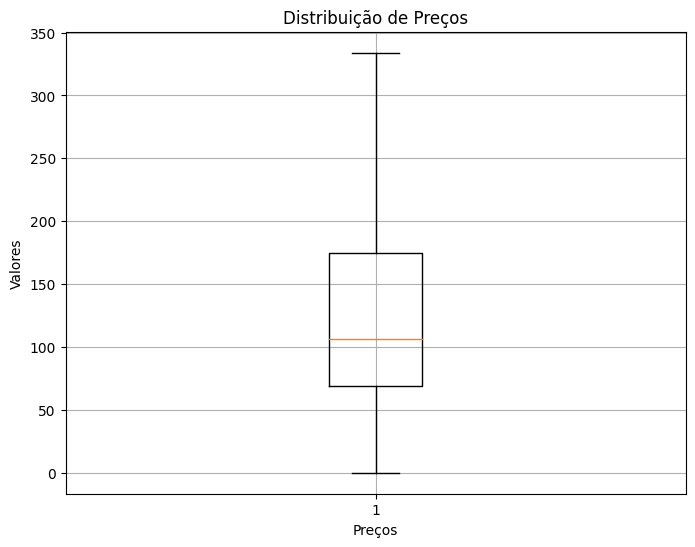

In [ ]:
# Plotando boxplot para verificar a distribuição dos dados

plt.figure(figsize=(8,6))  # Ajustar o tamanho da figura
plt.boxplot(df.price, showfliers=False)  # Não mostrar outliers
plt.xlabel('Preços')  # Adicionar rótulo ao eixo x
plt.ylabel('Valores')  # Adicionar rótulo ao eixo y
plt.title('Distribuição de Preços')  # Adicionar título
plt.grid(True)  # Adicionar grades ao gráfico para melhor referência
plt.show()

In [ ]:
prices_higher_or_equal_4000 = len(df.query("price >= 4000"))
print("prices higher or equal than 4000:", prices_higher_or_equal_4000)

prices higher or equal than 4000: 35


Como os valores acima de 4000 são irrelenvantes considerando o tamanho do dataset posso cosiderar remove-los

In [ ]:
print("valores <= 2000:",len(df.query("price <= 2000")))

valores <= 2000: 48808


In [ ]:
print("valores > 1000:",len(df.query("price > 1000")))

valores > 1000: 239


Descoberta: A maioria dos alugueis estão abaixo de 1000

## Analisando correlações

In [ ]:
bairro_in_df = df['bairro_group'].unique()
print("Bairros no dataframe:",bairro_in_df)

Bairros no dataframe: ['Manhattan' 'Brooklyn' 'Queens' 'Staten Island' 'Bronx']


Como o bairro é um dado categorico importante deve ser convertido para númerico.

In [ ]:
label_encoder_bairro_group = LabelEncoder()
# Aplicar a codificação de rótulos à coluna categórica
df['bairro_group'] = label_encoder_bairro_group.fit_transform(df['bairro_group'])

In [ ]:
bairro_group_array = df['bairro_group'].unique()
bairro_group_array

array([2, 1, 3, 4, 0])

In [ ]:
room_type_in_df = df['room_type'].unique()
room_type_in_df

array(['Entire home/apt', 'Private room', 'Shared room'], dtype=object)

In [ ]:
label_encoder_room_type = LabelEncoder()

In [ ]:
df['room_type'] = label_encoder_room_type.fit_transform(df['room_type'])

In [ ]:
room_type_in_df = df['room_type'].unique()
room_type_in_df

array([0, 1, 2])

In [ ]:
bairro_array = df['bairro'].unique()
print("Bairros no dataframe:", len(bairro_array))

Bairros no dataframe: 221


In [ ]:
label_encoder_bairro = LabelEncoder()

In [ ]:
df['bairro'] = label_encoder_bairro.fit_transform(df['bairro'])

In [ ]:
df.corr("pearson")

<ipython-input-340-0fcaa2dbcc47>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr("pearson")


,id,host_id,bairro_group,bairro,latitude,longitude,room_type,price,minimo_noites,numero_de_reviews,reviews_por_mes,calculado_host_listings_count,disponibilidade_365
id,1.000000,0.588282,0.062253,-0.033209,-0.003178,0.090896,0.066055,0.010618,-0.013235,-0.319782,0.291810,0.133274,0.085541
host_id,0.588282,1.000000,0.113517,-0.028343,0.020199,0.127049,0.090468,0.015309,-0.017370,-0.140113,0.296406,0.154951,0.203535
bairro_group,0.062253,0.113517,1.000000,0.111335,0.279541,0.101164,-0.016321,0.044246,0.017399,0.003847,0.073780,0.073671,0.080489
bairro,-0.033209,-0.028343,0.111335,1.000000,0.234799,-0.102381,-0.071965,0.062057,0.026000,-0.038342,-0.049377,0.010327,-0.034657
latitude,-0.003178,0.020199,0.279541,0.234799,1.000000,0.084777,0.006509,0.033939,0.024861,-0.015399,-0.010168,0.019517,-0.010926
longitude,0.090896,0.127049,0.101164,-0.102381,0.084777,1.000000,0.184351,-0.150020,-0.062750,0.059092,0.145941,-0.114713,0.082751
room_type,0.066055,0.090468,-0.016321,-0.071965,0.006509,0.184351,1.000000,-0.249351,-0.069787,0.002730,0.040688,-0.106055,0.022466
price,0.010618,0.015309,0.044246,0.062057,0.033939,-0.150020,-0.249351,1.000000,0.042799,-0.047954,-0.030608,0.057472,0.081833
minimo_noites,-0.013235,-0.017370,0.017399,0.026000,0.024861,-0.062750,-0.069787,0.042799,1.000000,-0.080118,-0.121708,0.127960,0.144320
numero_de_reviews,-0.319782,-0.140113,0.003847,-0.038342,-0.015399,0.059092,0.002730,-0.047954,-0.080118,1.000000,0.549865,-0.072376,0.172047


As correlações mais relevantes de preço são a disponibilidade e a longitude.

In [ ]:
df.corr("spearman")

<ipython-input-341-161ee86d3b91>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr("spearman")


,id,host_id,bairro_group,bairro,latitude,longitude,room_type,price,minimo_noites,numero_de_reviews,reviews_por_mes,calculado_host_listings_count,disponibilidade_365
id,1.000000,0.558891,0.061026,-0.028459,0.004942,0.070682,0.058972,-0.020723,-0.057847,-0.307931,0.360423,0.135316,0.165786
host_id,0.558891,1.000000,0.131927,-0.023412,0.049570,0.108952,0.109235,-0.071757,-0.130302,-0.128001,0.267876,0.147339,0.173364
bairro_group,0.061026,0.131927,1.000000,0.160292,0.517335,-0.048204,-0.036689,0.124842,-0.020397,-0.021022,0.048067,0.061869,0.076301
bairro,-0.028459,-0.023412,0.160292,1.000000,0.287625,-0.172964,-0.075244,0.160188,0.045729,-0.051864,-0.066106,-0.036559,-0.038687
latitude,0.004942,0.049570,0.517335,0.287625,1.000000,0.035090,-0.019136,0.136191,0.022248,-0.044345,-0.023181,0.003579,-0.006906
longitude,0.070682,0.108952,-0.048204,-0.172964,0.035090,1.000000,0.239880,-0.438031,-0.118939,0.079851,0.119081,0.063548,0.068922
room_type,0.058972,0.109235,-0.036689,-0.075244,-0.019136,0.239880,1.000000,-0.676055,-0.217218,-0.014902,0.034049,0.177784,0.009789
price,-0.020723,-0.071757,0.124842,0.160188,0.136191,-0.438031,-0.676055,1.000000,0.101304,-0.055012,-0.018515,-0.106108,0.086072
minimo_noites,-0.057847,-0.130302,-0.020397,0.045729,0.022248,-0.118939,-0.217218,0.101304,1.000000,-0.174901,-0.288838,0.064163,0.076032
numero_de_reviews,-0.307931,-0.128001,-0.021022,-0.051864,-0.044345,0.079851,-0.014902,-0.055012,-0.174901,1.000000,0.706211,0.056048,0.236659


Analisando a correlação com outro método também se destaca a correlação de preço com o número minimo de noites, o bairro group, bairro e o tipo de quarto

In [ ]:
def get_original_categorical_value(df, encoder, column):
  # Recuperar os valores originais
  original_values = encoder.inverse_transform(df[column])

  # Obter a correspondência entre os valores numéricos e os valores originais
  correspondency = dict(zip(df[column], original_values))

  # Exibir a correspondência
  print(correspondency)
  return correspondency

In [ ]:
dict_original_bairros_group_values = get_original_categorical_value(df,
                                                              label_encoder_bairro_group,
                                                              "bairro_group")
dict_original_room_type_values = get_original_categorical_value(df,
                                                         label_encoder_room_type,
                                                         "room_type")

dict_original_bairro_values = get_original_categorical_value(df,
                                                         label_encoder_bairro,
                                                         "bairro")

{2: 'Manhattan', 1: 'Brooklyn', 3: 'Queens', 4: 'Staten Island', 0: 'Bronx'}
{0: 'Entire home/apt', 1: 'Private room', 2: 'Shared room'}
{127: 'Midtown', 94: 'Harlem', 41: 'Clinton Hill', 61: 'East Harlem', 137: 'Murray Hill', 13: 'Bedford-Stuyvesant', 95: "Hell's Kitchen", 202: 'Upper West Side', 35: 'Chinatown', 182: 'South Slope', 209: 'West Village', 214: 'Williamsburg', 80: 'Fort Greene', 34: 'Chelsea', 51: 'Crown Heights', 151: 'Park Slope', 216: 'Windsor Terrace', 103: 'Inwood', 64: 'East Village', 91: 'Greenpoint', 28: 'Bushwick', 74: 'Flatbush', 119: 'Lower East Side', 159: 'Prospect-Lefferts Gardens', 117: 'Long Island City', 112: 'Kips Bay', 178: 'SoHo', 201: 'Upper East Side', 158: 'Prospect Heights', 206: 'Washington Heights', 220: 'Woodside', 25: 'Brooklyn Heights', 31: 'Carroll Gardens', 85: 'Gowanus', 76: 'Flatlands', 43: 'Cobble Hill', 77: 'Flushing', 19: 'Boerum Hill', 189: 'Sunnyside', 53: 'DUMBO', 186: 'St. George', 96: 'Highbridge', 73: 'Financial District', 166: '

In [ ]:
anuncios_per_group_bairro_dict = {}
for index in dict_original_bairros_group_values:
  anuncios_per_group_bairro = len(df.query(f"bairro_group == {index}"))
  print(f"Quartos para alugar em {dict_original_bairros_group_values[index]}:{anuncios_per_group_bairro}")
  anuncios_per_group_bairro_dict[dict_original_bairros_group_values[index]] = anuncios_per_group_bairro


Quartos para alugar em Manhattan:21661
Quartos para alugar em Brooklyn:20103
Quartos para alugar em Queens:5666
Quartos para alugar em Staten Island:373
Quartos para alugar em Bronx:1091


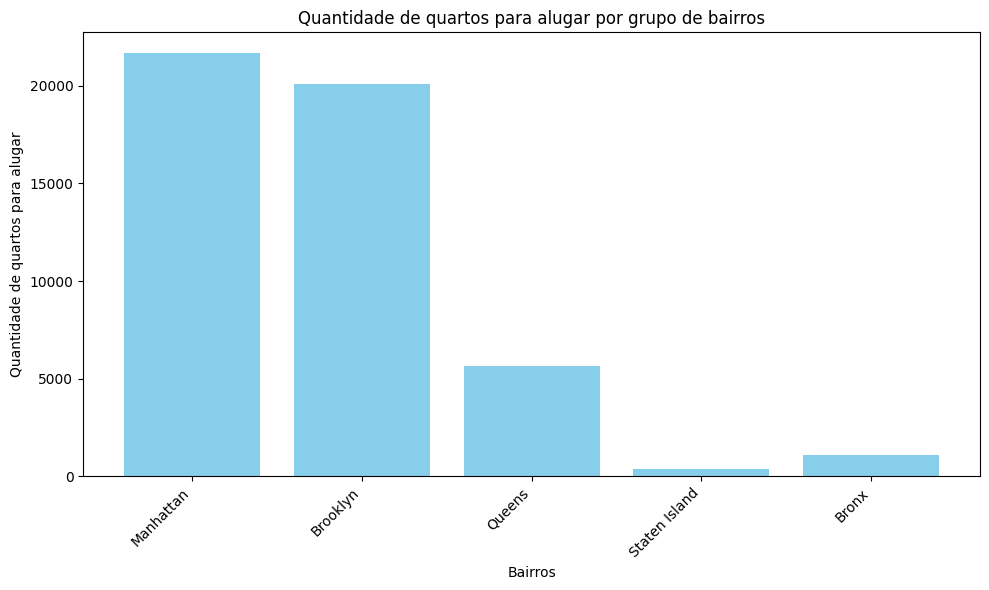

In [ ]:
plt.figure(figsize=(10, 6))  # Ajustando o tamanho da figura
# Obtendo os bairros e os valores médios de preços
bairros = list(anuncios_per_group_bairro_dict.keys())
valores = list(anuncios_per_group_bairro_dict.values())

plt.bar(bairros, valores, color='skyblue')

# Adicionando rótulos e título
plt.xlabel('Bairros')
plt.ylabel('Quantidade de quartos para alugar')
plt.title('Quantidade de quartos para alugar por grupo de bairros')

# Exibindo o gráfico
plt.xticks(rotation=45, ha='right')  # Ajustando a rotação e alinhamento dos rótulos
plt.tight_layout()
plt.show()

In [ ]:
bairro_group_mean_price_dict = {}
for bairro in bairro_group_array:
  mean_price = df.query(f"bairro_group == {bairro}").price.mean()
  bairro_group_name = dict_original_bairros_group_values[bairro]
  bairro_group_mean_price_dict[bairro_group_name] = mean_price
  print(f"mean price in {bairro_group_name}:", mean_price)

mean price in Manhattan: 196.8758136743456
mean price in Brooklyn: 124.38198278863851
mean price in Queens: 99.51764913519237
mean price in Staten Island: 114.81233243967829
mean price in Bronx: 87.4967919340055


In [ ]:
bairro_group_mean_price_dict

{'Manhattan': 196.8758136743456,
 'Brooklyn': 124.38198278863851,
 'Queens': 99.51764913519237,
 'Staten Island': 114.81233243967829,
 'Bronx': 87.4967919340055}

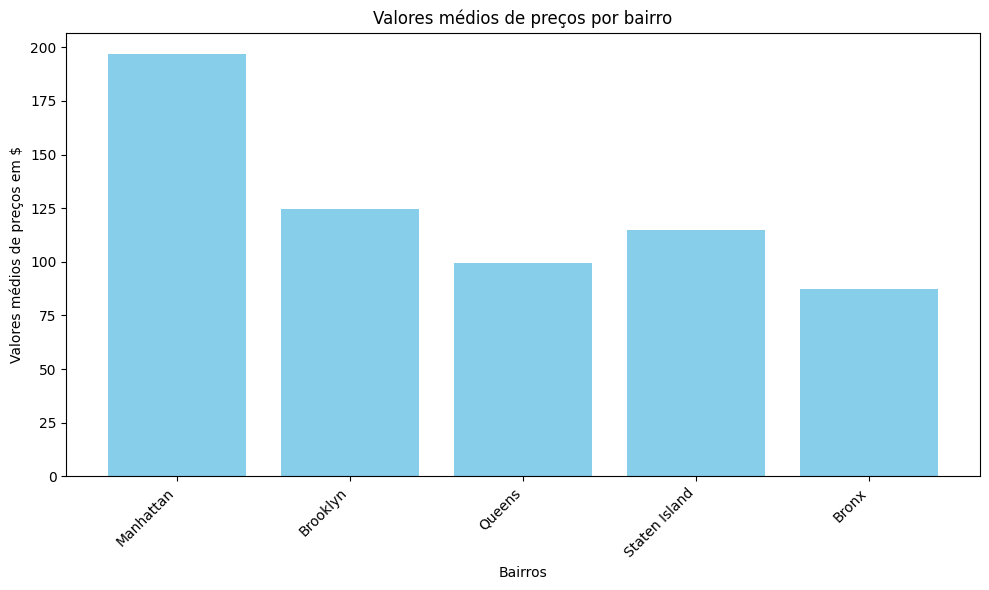

In [ ]:
plt.figure(figsize=(10, 6))  # Ajustando o tamanho da figura
# Obtendo os bairros e os valores médios de preços
bairros = list(bairro_group_mean_price_dict.keys())
valores = list(bairro_group_mean_price_dict.values())

plt.bar(bairros, valores, color='skyblue')

# Adicionando rótulos e título
plt.xlabel('Bairros')
plt.ylabel('Valores médios de preços em $')
plt.title('Valores médios de preços por bairro')

# Exibindo o gráfico
plt.xticks(rotation=45, ha='right')  # Ajustando a rotação e alinhamento dos rótulos
plt.tight_layout()
plt.show()

In [ ]:
for room_type in room_type_in_df:
  mean_price = df.query(f"room_type == {room_type}").price.mean()
  print(f"mean price in {dict_original_room_type_values[room_type]}:", mean_price)

mean price in Entire home/apt: 211.79424613325986
mean price in Private room: 89.778320268757
mean price in Shared room: 70.12758620689655


Verificar o tipo predominante de quarto de cada bairro

In [ ]:
def count_room_types_by_bairro(df, bairro):
  df_only_one_bairro = df.query(f"bairro_group == {bairro}")
  df_only_one_bairro["room_type"].value_counts()
  return df_only_one_bairro["room_type"].value_counts()

Manhattan
Entire home/apt: 13199
Private room: 7982
Shared room: 480



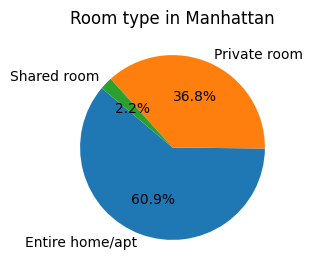

Brooklyn
Private room: 10131
Entire home/apt: 9559
Shared room: 413



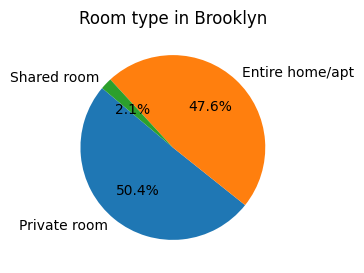

Queens
Private room: 3372
Entire home/apt: 2096
Shared room: 198



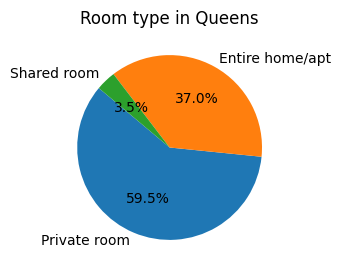

Staten Island
Private room: 188
Entire home/apt: 176
Shared room: 9



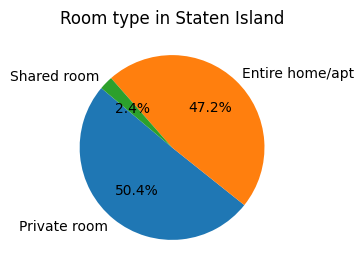

Bronx
Private room: 652
Entire home/apt: 379
Shared room: 60



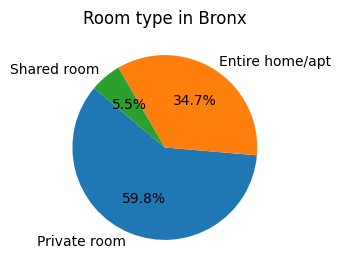

In [ ]:
for bairro in bairro_group_array:
  room_types_in_bairro = count_room_types_by_bairro(df, bairro)
  print(dict_original_bairros_group_values[bairro])
  new_dict = {}
  for key in room_types_in_bairro.keys():
    new_dict[dict_original_room_type_values[key]] = room_types_in_bairro[key]
    print(f"{dict_original_room_type_values[key]}: {room_types_in_bairro[key]}")
  print()

  plt.figure(figsize=(3, 3))

  plt.pie(new_dict.values(),
          labels=new_dict.keys(),
          autopct='%1.1f%%', startangle=140)

  # Adicionar um título
  plt.title(f'Room type in {dict_original_bairros_values[bairro]}')

  # Exibir o gráfico
  plt.show()

Pegar o bairro mais caro e o mais barato de cada bairro

Descoberta: Grupos de bairros que tem a maioria dos tipos de quarto como casa ou apartamento são os com aluguel com maior preço

In [ ]:
bairro_values_in_group_bairros_dict = {}
for bairro_group in dict_original_bairros_group_values:
  df_per_bairro_group = df.query(f"bairro_group == {bairro_group}")
  bairros = df_per_bairro_group.bairro.unique()
  aux = {}
  for bairro in bairros:
    df_per_bairro = df.query(f"bairro == {bairro}")
    mean_price_per_bairro = df_per_bairro.price.mean()
    aux[bairro] = mean_price_per_bairro

    # Obter o valor máximo
  max_value = max(aux.values())

  # Obter a chave correspondente ao valor máximo
  max_key = max(aux, key=aux.get)

  # Obter o valor mínimo
  min_value = min(aux.values())

  # Obter a chave correspondente ao valor mínimo
  min_key = min(aux, key=aux.get)

  bairro_values_in_group_bairros_dict[dict_original_bairros_group_values[bairro_group]] = {dict_original_bairro_values[max_key]:max_value,
                                                                                           dict_original_bairro_values[min_key]:min_value}


bairro_values_in_group_bairros_dict

{'Manhattan': {'Tribeca': 490.638418079096, 'Inwood': 88.89682539682539},
 'Brooklyn': {'Sea Gate': 487.85714285714283,
  'Borough Park': 63.06617647058823},
 'Queens': {'Neponsit': 274.6666666666667, 'Corona': 59.171875},
 'Staten Island': {'Fort Wadsworth': 800.0, "Bull's Head": 47.333333333333336},
 'Bronx': {'Riverdale': 442.09090909090907, 'Hunts Point': 50.5}}

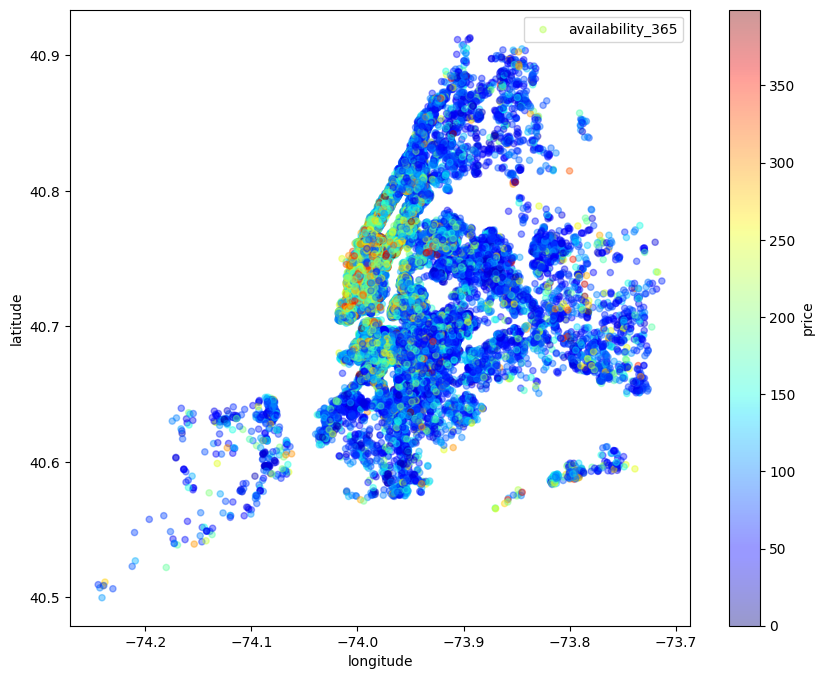

In [ ]:
viz_4= df[df.price < 400].plot(kind='scatter', x='longitude', y='latitude', label='availability_365', c='price',
                  cmap=plt.get_cmap('jet'), colorbar=True, alpha=0.4, figsize=(10,8))
viz_4.legend()

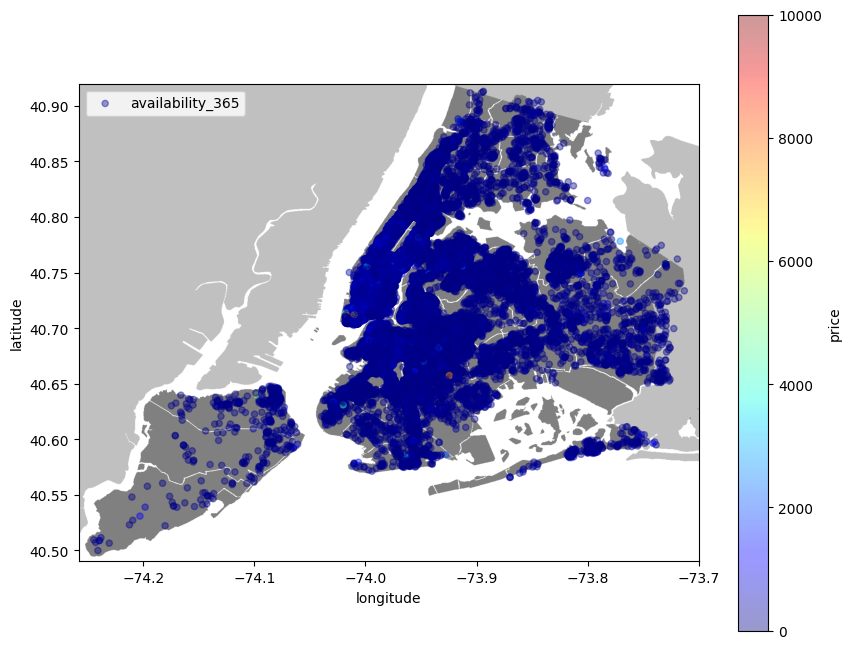

In [ ]:
import urllib
#initializing the figure size
plt.figure(figsize=(10,8))
#loading the png NYC image found on Google and saving to my local folder along with the project
url = 'https://upload.wikimedia.org/wikipedia/commons/e/ec/Neighbourhoods_New_York_City_Map.PNG'
# urllib.request.urlretrieve(url, 'nyc_image.png')
nyc_img = plt.imread("nyc_image.png")
#scaling the image based on the latitude and longitude max and mins for proper output
plt.imshow(nyc_img,zorder=0,extent=[-74.258, -73.7, 40.49,40.92])
ax=plt.gca()
#using scatterplot again
df.plot(kind='scatter', x='longitude', y='latitude', label='availability_365', c='price', ax=ax,
           cmap=plt.get_cmap('jet'), colorbar=True, alpha=0.4, zorder=5)

plt.legend()
plt.show()

In [ ]:
def count_words_by_column(df, column):
  count_words={}
  for name in df[column]:
    if not isinstance(name, str): continue
    name_splited = name.split()
    for word in name_splited:
      word = word.lower()
      if word in count_words:
          count_words[word] += 1
      else:
          count_words[word] = 1
  return count_words

In [ ]:
dict_words_names_df = count_words_by_column(df, "nome")
list_words_names_df_sorted = sorted(dict_words_names_df.items(), key=lambda x: x[1], reverse=True)

# Imprimindo as chaves e os valores ordenados
count = 0
for chave, valor in list_words_names_df_sorted:
    print(chave, valor)
    count += 1
    if count == 10: break

in 16733
room 9389
bedroom 7231
private 6985
apartment 6113
cozy 4634
the 3868
to 3827
studio 3772
brooklyn 3629


In [ ]:
highter_prices = df[df.price > 500]
dict_words_names_df = count_words_by_column(highter_prices, "nome")
list_words_names_df_sorted = sorted(dict_words_names_df.items(), key=lambda x: x[1], reverse=True)

# Imprimindo as chaves e os valores ordenados
count = 0
for chave, valor in list_words_names_df_sorted:
    print(chave, valor)
    count += 1
    if count == 10: break

in 222
bedroom 127
luxury 121
loft 101
2 96
the 76
3 72
with 72
apartment 72
- 70


In [ ]:
smaller_prices = df[df.price < 50 ]
dict_words_names_df = count_words_by_column(smaller_prices, "nome")
list_words_names_df_sorted = sorted(dict_words_names_df.items(), key=lambda x: x[1], reverse=True)

# Imprimindo as chaves e os valores ordenados
count = 0
for chave, valor in list_words_names_df_sorted:
    print(chave, valor)
    count += 1
    if count == 10: break

room 2173
in 1911
private 1045
cozy 713
bedroom 680
to 567
brooklyn 513
and 357
apartment 332
& 319


In [ ]:
df = pd.read_csv(r"/content/drive/MyDrive/database/teste_indicium_precificacao.csv")
df.head(3)

,id,nome,host_id,host_name,bairro_group,bairro,latitude,longitude,room_type,price,minimo_noites,numero_de_reviews,ultima_review,reviews_por_mes,calculado_host_listings_count,disponibilidade_365
0,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
1,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
2,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194


In [ ]:
df_codificado = pd.get_dummies(df['bairro_group'])
df_codificado = pd.get_dummies(df['room_type'])
df = pd.concat([df, df_codificado], axis=1)

df.head(3)

,id,nome,host_id,host_name,bairro_group,bairro,latitude,longitude,room_type,price,minimo_noites,numero_de_reviews,ultima_review,reviews_por_mes,calculado_host_listings_count,disponibilidade_365,Entire home/apt,Private room,Shared room
0,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355,1,0,0
1,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365,0,1,0
2,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194,1,0,0


In [ ]:
df.corr("pearson")

<ipython-input-361-0fcaa2dbcc47>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr("pearson")


,id,host_id,latitude,longitude,price,minimo_noites,numero_de_reviews,reviews_por_mes,calculado_host_listings_count,disponibilidade_365,Entire home/apt,Private room,Shared room
id,1.000000,0.588282,-0.003178,0.090896,0.010618,-0.013235,-0.319782,0.291810,0.133274,0.085541,-0.054870,0.037748,0.056581
host_id,0.588282,1.000000,0.020199,0.127049,0.015309,-0.017370,-0.140113,0.296406,0.154951,0.203535,-0.077611,0.056636,0.069412
latitude,-0.003178,0.020199,1.000000,0.084777,0.033939,0.024861,-0.015399,-0.010168,0.019517,-0.010926,-0.005744,0.004396,0.004468
longitude,0.090896,0.127049,0.084777,1.000000,-0.150020,-0.062750,0.059092,0.145941,-0.114713,0.082751,-0.192155,0.183626,0.029811
price,0.010618,0.015309,0.033939,-0.150020,1.000000,0.042799,-0.047954,-0.030608,0.057472,0.081833,0.255859,-0.240249,-0.053613
minimo_noites,-0.013235,-0.017370,0.024861,-0.062750,0.042799,1.000000,-0.080118,-0.121708,0.127960,0.144320,0.074894,-0.073831,-0.004219
numero_de_reviews,-0.319782,-0.140113,-0.015399,0.059092,-0.047954,-0.080118,1.000000,0.549865,-0.072376,0.172047,-0.010094,0.017261,-0.023356
reviews_por_mes,0.291810,0.296406,-0.010168,0.145941,-0.030608,-0.121708,0.549865,1.000000,-0.009421,0.185835,-0.041583,0.039145,0.008744
calculado_host_listings_count,0.133274,0.154951,0.019517,-0.114713,0.057472,0.127960,-0.072376,-0.009421,1.000000,0.225711,0.112193,-0.108945,-0.011737
disponibilidade_365,0.085541,0.203535,-0.010926,0.082751,0.081833,0.144320,0.172047,0.185835,0.225711,1.000000,-0.006764,-0.011029,0.058302


In [ ]:
scaler = StandardScaler()
dados_numericos = df.select_dtypes(include=['float64', 'int64'])
# Ajustar o scaler aos dados e transformar os dados
dados_normalizados = scaler.fit_transform(dados_numericos)

df_normalizado = pd.DataFrame(dados_normalizados, columns=dados_numericos.columns)

# Concatenar as colunas não numéricas de volta ao DataFrame normalizado
colunas_nao_numericas = df.select_dtypes(exclude=['float64', 'int64']).columns
for col in colunas_nao_numericas:
    df_normalizado[col] = df[col]

df_normalizado.head(5)

,id,host_id,latitude,longitude,price,minimo_noites,numero_de_reviews,reviews_por_mes,calculado_host_listings_count,disponibilidade_365,nome,host_name,bairro_group,bairro,room_type,ultima_review,Entire home/apt,Private room,Shared room
0,-1.731342,-0.860173,0.452411,-0.684642,0.300970,-0.293999,0.487654,-0.591069,-0.156104,1.840364,Skylit Midtown Castle,Jennifer,Manhattan,Midtown,Entire home/apt,2019-05-21,1,0,0
1,-1.731247,-0.860151,1.468387,0.222486,-0.011329,-0.196489,-0.522435,NaN,-0.186450,1.916342,THE VILLAGE OF HARLEM....NEW YORK !,Elisabeth,Manhattan,Harlem,Private room,NaN,0,1,0
2,-1.731230,-0.860148,-0.803438,-0.164457,-0.265333,-0.293999,5.538098,1.943994,-0.186450,0.617121,Cozy Entire Floor of Brownstone,LisaRoxanne,Brooklyn,Clinton Hill,Entire home/apt,2019-07-05,1,0,0
3,-1.731121,-0.860118,1.275645,0.177205,-0.302809,0.144799,-0.320417,-0.757693,-0.186450,-0.856849,Entire Apt: Spacious Studio/Loft by central park,Laura,Manhattan,East Harlem,Entire home/apt,2018-11-19,1,0,0
4,-1.731114,-0.860116,0.343295,-0.494637,0.196870,-0.196489,1.138600,-0.466101,-0.186450,0.123265,Large Cozy 1 BR Apartment In Midtown East,Chris,Manhattan,Murray Hill,Entire home/apt,2019-06-22,1,0,0


In [ ]:
df_normalizado.corr("pearson")

<ipython-input-363-7edecaec7b77>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_normalizado.corr("pearson")


,id,host_id,latitude,longitude,price,minimo_noites,numero_de_reviews,reviews_por_mes,calculado_host_listings_count,disponibilidade_365,Entire home/apt,Private room,Shared room
id,1.000000,0.588282,-0.003178,0.090896,0.010618,-0.013235,-0.319782,0.291810,0.133274,0.085541,-0.054870,0.037748,0.056581
host_id,0.588282,1.000000,0.020199,0.127049,0.015309,-0.017370,-0.140113,0.296406,0.154951,0.203535,-0.077611,0.056636,0.069412
latitude,-0.003178,0.020199,1.000000,0.084777,0.033939,0.024861,-0.015399,-0.010168,0.019517,-0.010926,-0.005744,0.004396,0.004468
longitude,0.090896,0.127049,0.084777,1.000000,-0.150020,-0.062750,0.059092,0.145941,-0.114713,0.082751,-0.192155,0.183626,0.029811
price,0.010618,0.015309,0.033939,-0.150020,1.000000,0.042799,-0.047954,-0.030608,0.057472,0.081833,0.255859,-0.240249,-0.053613
minimo_noites,-0.013235,-0.017370,0.024861,-0.062750,0.042799,1.000000,-0.080118,-0.121708,0.127960,0.144320,0.074894,-0.073831,-0.004219
numero_de_reviews,-0.319782,-0.140113,-0.015399,0.059092,-0.047954,-0.080118,1.000000,0.549865,-0.072376,0.172047,-0.010094,0.017261,-0.023356
reviews_por_mes,0.291810,0.296406,-0.010168,0.145941,-0.030608,-0.121708,0.549865,1.000000,-0.009421,0.185835,-0.041583,0.039145,0.008744
calculado_host_listings_count,0.133274,0.154951,0.019517,-0.114713,0.057472,0.127960,-0.072376,-0.009421,1.000000,0.225711,0.112193,-0.108945,-0.011737
disponibilidade_365,0.085541,0.203535,-0.010926,0.082751,0.081833,0.144320,0.172047,0.185835,0.225711,1.000000,-0.006764,-0.011029,0.058302


In [ ]:
new_names_columns = {
    'id': 'Listing_ID',
    'nome': 'Listing_Name',
    'host_id': 'Host_ID',
    'host_name': 'Host_Name',
    'bairro_group': 'Neighborhood_Group',
    'bairro': 'Neighborhood',
    'latitude': 'Latitude',
    'longitude': 'Longitude',
    'room_type': 'Room_Type',
    'price': 'Price_Per_Night',
    'minimo_noites': 'Minimum_Nights',
    'numero_de_reviews': 'Number_of_Reviews',
    'ultima_review': 'Last_Review_Date',
    'reviews_por_mes': 'Reviews_Per_Month',
    'calculado_host_listings_count': 'Host_Listings_Count',
    'disponibilidade_365': 'Availability_365'
}

# Renomeando as colunas
df = df.rename(columns=new_names_columns)
